Importamos las librerias a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt             
from wordcloud import WordCloud

# Ingestamos los datos. Vemos las columnas.

In [2]:
udemy = pd.read_csv ('C:/Users/Francisco/Desktop/Mi proyecto 03/Moocs-20230127T135535Z-001/Moocs/udemy_courses.csv')
udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [3]:
edx = pd.read_csv('C:/Users/Francisco/Desktop/Mi proyecto 03/Moocs-20230127T135535Z-001/Moocs/edx_courses.csv')
edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [4]:
coursera_reviews = pd.read_csv('C:/Users/Francisco/Desktop/Mi proyecto 03/Moocs-20230127T135535Z-001/Moocs/Coursera_reviews.csv')
coursera_reviews.head(2)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training


In [5]:
coursera_courses = pd.read_csv('C:/Users/Francisco/Desktop/Mi proyecto 03/Moocs-20230127T135535Z-001/Moocs/Coursera_courses.csv')
coursera_courses.head(2)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada


# Empezamos con el analisis y la transformacion de los datos.

Udemy

In [8]:
# Info inicial.
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [9]:
# Buscamos cantidad de valores nulos.
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [10]:
#Utilizamos la función to_datetime para cambiar el tipo de dato de la columna de objet a date

udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

In [11]:
#Utilizamos la función dt.date para quedarnos solo con el año de la columna original "Published_timestanp"

udemy['fecha']= udemy['published_timestamp'].dt.date

In [12]:
#Reemplazamos los valores del 0 al 9 con espacios vacios, ya que al cargarlo en power bi notamos que habia datos enteros en la columna

udemy['level'] = udemy['level'].str.replace("[0-9]", "")

C:\Users\Francisco\AppData\Local\Temp\ipykernel_6308\80213950.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  udemy['level'] = udemy['level'].str.replace("[0-9]", "")


In [13]:
# le damos formato entero a price y formato string a level

udemy['price'] = udemy['price'].astype(int)
udemy['level'] = udemy['level'].astype(str)

In [14]:
#Borramos la columna URL ya que para la evaluacion no nos daba ningun tipo de informacion 

udemy = udemy.drop(columns=['url'])

## Wordcloud de los nombres de los cursos de Udemy.

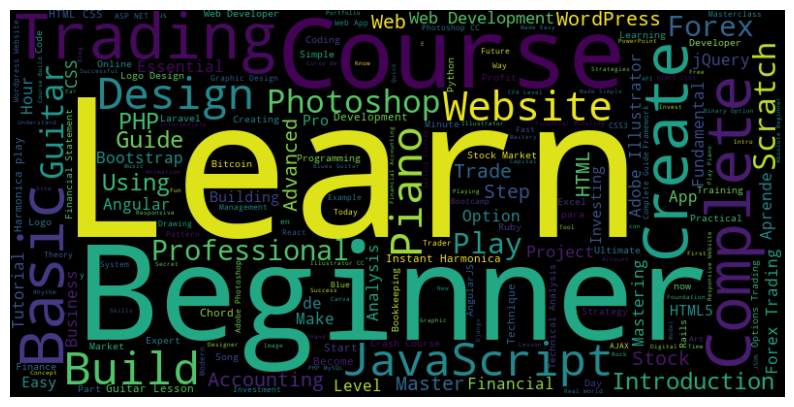

In [15]:

text = ' '.join(udemy['course_title'].tolist())

wordcloud = WordCloud(width=800, height=400, max_words=200).generate(text)
plt.figure(figsize=(10, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Edx.

In [17]:
# Info inicial.
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [18]:
#Buscamos valores nulos
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [19]:
# Llenamos los nulos con vacio
edx = edx.fillna('vacio')

In [20]:
#Borramos las columnas que no aportan informacion relvante
edx = edx.drop(columns=['course_syllabus','course_description','course_url'])

## Wordcloud de los nombres de los cursos de Edx.

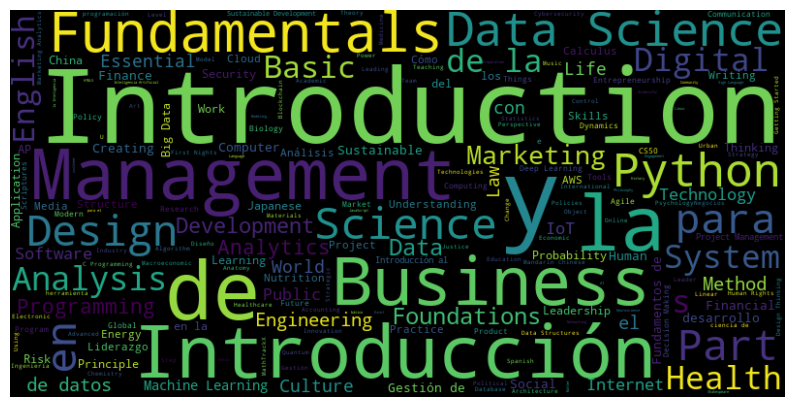

In [21]:


text = ' '.join(edx['title'].tolist())

wordcloud = WordCloud(width=800, height=400, max_words=200).generate(text)
plt.figure(figsize=(10, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Coursera General

In [22]:
#Info inicial
coursera_reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [23]:
#Buscamos valores nulos
coursera_reviews.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [24]:
#Completamos los vacios con vacio
coursera_reviews = coursera_reviews.fillna('vacio')

In [25]:
#Utilizamos la funcion to_datetime, para cambiar el tipo de dato de objeto a date de la columna
coursera_reviews['date_reviews'] = pd.to_datetime(coursera_reviews['date_reviews'])

In [26]:
#Creamos una neuva columna llamda fecha y con la funcion dt.date optenemos solo el año de la columna original "date_reviews"
coursera_reviews['fecha']= coursera_reviews['date_reviews'].dt.date
coursera_reviews['fecha'] = pd.to_datetime(coursera_reviews['fecha'])

In [27]:
#Creamos una nueva columna llamda hora y con la funcion dt.time obtenemos solo el horario de la columna original "date_reviews"
coursera_reviews['hora']= coursera_reviews['date_reviews'].dt.time

In [28]:
#Borramos duplicados.
coursera_reviews.drop_duplicates(inplace=True)

In [29]:
#Info inicial
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [30]:
#Buscamos valores nulos
coursera_courses.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

## Wordcloud de los nombres de los cursos de Coursera.

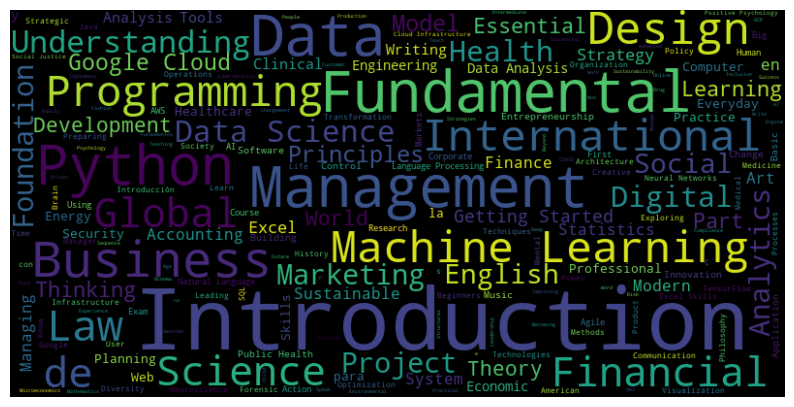

In [31]:

text = ' '.join(coursera_courses['name'].tolist())


wordcloud = WordCloud(width=800, height=400, max_words=200).generate(text)

plt.figure(figsize=(10, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Modificaciones e implementaciones Realizadas en Power BI

##                UDEMY

Al cargar el dataset en power bi se utilizo la primera fila como encabezados.

Realize es medida para calcular el monto facturado total

Medida - Precio_cant_Subscriptores = udemy_copy[price]*udemy_copy[num_subscribers]

Al cargar el dataset en power bi se utilizo la primera fila como encabezados.

Dentro de power query utilizo la funcion Text.Select([price],{"0".."9"})) para tomar solo la parte entera de price ya que el valor de la certificacion estaba al final de la columna

Reemplazo en la columna n_enrolled las , por los . para poder cambiar el tipo de dato a entero.

#Realize la medida Precio_cant_enrolled para multiplicar el valor de la certifiacion contra la cantidad de subscriptos

Medida - Precio_cant_enrolled = edx_copy[Precio]*edx_copy[n_enrolled - Copia]

##                 Coursera_Reviews

Al cargar el dataset en power bi se utilizo la primera fila como encabezados.

Se crea la columna costo que es el valor de la cuota anual.

Se crea una nueva columna llamadada rating copia utilizando un if creamos un escala donde 5 es Muy bueno y 1 es muy malo.

Filtro_por_rating = 

IF(coursera_reviwes_copy[rating]<=1,"Muy malo",

IF(coursera_reviwes_copy[rating] = 2, "Malo",

IF(coursera_reviwes_copy[rating] = 3, "Regular",

IF(coursera_reviwes_copy[rating] = 4, "Bueno",

IF(coursera_reviwes_copy[rating] = 5, "Muy bueno",

"Sin Ranking")))))

#Creo las medida Cantidad_De_Cursos con la funcion distinctcount para sumar los valores unicos

Medida - Cantidad_de_cursos = DISTINCTCOUNT(coursera_cursos_copy[course_id])

#Creo las medida cantidad_de_filtro_rating con la funcion distinctcount para sumar los valores 

Medida - cantidad_de_filtro_rating = COUNT(coursera_reviwes_copy[Filtro_por_rating])

#Creo las medida Cantidad_de_instituciones  con la funcion distinctcount para sumar los valores unicos

Medida - Cantidad_de_instituciones = DISTINCTCOUNT(coursera_cursos_copy[institution])


##                  Coursera_Cursos

Al cargar el dataset en power bi se utilizo la primera fila como encabezados.
